#  Food Group Nutrients Analysis - RightFood_HealthyFood

## Project Goal

The goal of this project is to check the amount of calories and other nutrient present in different categories of food. From the finding, we will be able understand the quality of food that we are consuming every day. It will help each and every individual who are diet conscious or people who are trying to figure out the quality of food they are consuming. After the analysis it will be easy for a person to pick the right food over the counter.  

## Summary of Data

The dataset used for analysis contains 40 major food nutrients like calories, fat, vitamins, minerals etc. And it also contains 25 different categories of food products like Beef Products, Vegetable Products, Baked Products etc. Analysis is done on wide range of data present.

#### Data Source : https://www.kaggle.com/haithemhermessi/usda-national-nutrient-database/download

## Data Visualization

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import sklearn

In [2]:
#Importing Dataset
df = pd.read_csv("train.csv")

In [3]:
#Reading the dataset
df

,ID,FoodGroup,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,16116,Legumes and Legume Products,"Soy flour, full-fat, roasted",441.0,34.80,21.86,33.67,7.61,9.7,6.0,...,0.5675,0.205375,0.723846,0.343333,0.156667,0.002468,0.878571,0.680000,0.136364,0.325455
1,18316,Baked Products,"Pie, coconut custard, commercially prepared",260.0,5.90,13.20,30.20,0.00,1.8,26.0,...,0.0475,0.025188,0.113846,0.073333,0.067500,0.000070,0.042857,0.174286,0.116364,0.061818
2,15261,Finfish and Shellfish Products,"Fish, tilapia, raw",96.0,20.08,1.70,0.00,0.00,0.0,0.0,...,0.0600,0.243938,0.048462,0.034167,0.008333,0.000083,0.064286,0.242857,0.760000,0.030000
3,8417,Breakfast Cereals,"Cereals, QUAKER, Instant Oatmeal, Banana Bread...",368.0,8.97,4.85,75.70,29.45,6.7,0.0,...,0.0000,0.706875,0.769231,0.816667,0.230833,0.000000,0.219048,0.450000,0.000000,0.188182
4,20022,Cereal Grains and Pasta,"Cornmeal, degermed, enriched, yellow",370.0,7.11,1.75,79.45,1.61,3.9,11.0,...,0.8375,0.310500,0.293846,0.459167,0.002500,0.000084,0.076190,0.141429,0.190909,0.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,12131,Nut and Seed Products,"Nuts, macadamia nuts, raw",718.0,7.91,75.77,13.82,4.57,8.6,0.0,...,0.0275,0.154562,0.124615,0.995833,0.070833,0.000840,0.309524,0.268571,0.065455,0.118182
6890,1189,Dairy and Egg Products,KRAFT CHEEZ WHIZ LIGHT Pasteurized Process Che...,215.0,16.30,9.50,16.20,8.20,0.2,0.0,...,0.0000,0.000000,0.253846,0.000000,0.348333,0.000000,0.000000,1.347143,0.000000,0.214545
6891,19010,Snacks,"Snacks, crisped rice bar, chocolate chip",404.0,5.10,13.50,73.00,0.00,2.2,0.0,...,0.3500,0.440625,0.461538,0.441667,0.017500,0.000344,0.114286,0.191429,0.176364,0.078182
6892,20330,Cereal Grains and Pasta,"Hominy, canned, yellow",72.0,1.48,0.88,14.26,0.00,2.5,0.0,...,0.0025,0.002063,0.004615,0.002500,0.008333,0.000033,0.038095,0.050000,0.054545,0.095455


## Checking and cleaning the dataset

In [4]:
#Checking the shape of the data
df.shape

(6894, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6894 non-null   int64  
 1   FoodGroup         6894 non-null   object 
 2   Descrip           6894 non-null   object 
 3   Energy_kcal       6894 non-null   float64
 4   Protein_g         6894 non-null   float64
 5   Fat_g             6894 non-null   float64
 6   Carb_g            6894 non-null   float64
 7   Sugar_g           6894 non-null   float64
 8   Fiber_g           6894 non-null   float64
 9   VitA_mcg          6894 non-null   float64
 10  VitB6_mg          6894 non-null   float64
 11  VitB12_mcg        6894 non-null   float64
 12  VitC_mg           6894 non-null   float64
 13  VitE_mg           6894 non-null   float64
 14  Folate_mcg        6894 non-null   float64
 15  Niacin_mg         6894 non-null   float64
 16  Riboflavin_mg     6894 non-null   float64


In [6]:
df.head()

,ID,FoodGroup,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,16116,Legumes and Legume Products,"Soy flour, full-fat, roasted",441.0,34.80,21.86,33.67,7.61,9.7,6.0,...,0.5675,0.205375,0.723846,0.343333,0.156667,0.002468,0.878571,0.680000,0.136364,0.325455
1,18316,Baked Products,"Pie, coconut custard, commercially prepared",260.0,5.90,13.20,30.20,0.00,1.8,26.0,...,0.0475,0.025188,0.113846,0.073333,0.067500,0.000070,0.042857,0.174286,0.116364,0.061818
2,15261,Finfish and Shellfish Products,"Fish, tilapia, raw",96.0,20.08,1.70,0.00,0.00,0.0,0.0,...,0.0600,0.243938,0.048462,0.034167,0.008333,0.000083,0.064286,0.242857,0.760000,0.030000
3,8417,Breakfast Cereals,"Cereals, QUAKER, Instant Oatmeal, Banana Bread...",368.0,8.97,4.85,75.70,29.45,6.7,0.0,...,0.0000,0.706875,0.769231,0.816667,0.230833,0.000000,0.219048,0.450000,0.000000,0.188182
4,20022,Cereal Grains and Pasta,"Cornmeal, degermed, enriched, yellow",370.0,7.11,1.75,79.45,1.61,3.9,11.0,...,0.8375,0.310500,0.293846,0.459167,0.002500,0.000084,0.076190,0.141429,0.190909,0.060000


In [7]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,...,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000
mean,15450.896722,227.002901,11.516700,10.656012,21.962522,6.644353,2.027169,94.095445,0.265938,1.224388,...,0.126856,0.214064,0.182227,0.173375,0.062108,0.000191,0.077790,0.224120,0.232290,0.180259
std,9232.247168,170.081756,10.500028,15.933822,27.327881,13.766262,4.323947,801.864914,0.485382,4.153000,...,0.456221,0.288509,0.312280,0.364575,0.175117,0.000591,0.131987,0.306925,0.545999,0.297952
min,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8683.250000,93.000000,2.452500,1.000000,0.040000,0.000000,0.000000,0.000000,0.034000,0.000000,...,0.000000,0.025000,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,190.000000,8.300000,5.220000,9.005000,0.330000,0.300000,2.000000,0.120000,0.080000,...,0.017500,0.133656,0.115385,0.065000,0.015833,0.000088,0.047619,0.190714,0.072727,0.078182
75%,20070.750000,336.000000,19.997500,13.815000,33.500000,5.400000,2.400000,21.000000,0.355000,1.300000,...,0.065000,0.315047,0.200000,0.191667,0.051458,0.000163,0.069048,0.308571,0.390909,0.245455
max,93600.000000,902.000000,88.320000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,6.892500,5.000000,5.230769,9.333333,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


### Data Examination and cleaning it according to our requirement

This dataset is a part of **Methods and Application of Food Composition Laboratory** which mission is to identify critical food composition needs for researchers, policymakers, food producers etc. 

reference:https://www.kaggle.com/haithemhermessi/usda-national-nutrient-database?select=train.csv

In the above data set there are 40 different nutritional values. My goal of the project is to use the widely known food nutritient values to identify the food category. Thus, I have consider only 13 out of the 40 nutrients which I feel is know by a common man. The nutrients I have considered are as follows:
    1.Energy_kcal  
    2.Protein_g  
    3.Fat_g  
    4.Carb_g  
    5.Sugar_g  
    6.Fiber_g  
    7.VitA_mcg  
    8.VitB6_mg  
    9.VitB12_mcg  
    10.VitE_mg  
based on the above nutrient values I have done my analysis. I have used iloc to pick only the ones I have mentioned. 

The dataset contains 6894 entries which is sustainially good for my SVM model. 

In [8]:
#Choosing the columns which is easily understood by a common man 
df=df.iloc[:,1:14]

In [9]:
df.columns

Index(['FoodGroup', 'Descrip', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg'],
      dtype='object')

In [10]:
#Dropping Descrip column as it is was telling the ingridents present in the FoodGroup but not the nutrition in that
df=df.drop('Descrip',axis=1)
df

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg
0,Legumes and Legume Products,441.0,34.80,21.86,33.67,7.61,9.7,6.0,0.351,0.00,0.0,1.98
1,Baked Products,260.0,5.90,13.20,30.20,0.00,1.8,26.0,0.011,0.09,0.6,0.00
2,Finfish and Shellfish Products,96.0,20.08,1.70,0.00,0.00,0.0,0.0,0.162,1.58,0.0,0.40
3,Breakfast Cereals,368.0,8.97,4.85,75.70,29.45,6.7,0.0,1.140,0.00,0.9,0.44
4,Cereal Grains and Pasta,370.0,7.11,1.75,79.45,1.61,3.9,11.0,0.182,0.00,0.0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Nut and Seed Products,718.0,7.91,75.77,13.82,4.57,8.6,0.0,0.275,0.00,1.2,0.54
6890,Dairy and Egg Products,215.0,16.30,9.50,16.20,8.20,0.2,0.0,0.000,0.00,0.4,0.00
6891,Snacks,404.0,5.10,13.50,73.00,0.00,2.2,0.0,0.705,0.00,0.0,0.00
6892,Cereal Grains and Pasta,72.0,1.48,0.88,14.26,0.00,2.5,0.0,0.005,0.00,0.0,0.00


In [11]:
#Checking for any Null values
df.isnull().sum()

FoodGroup      0
Energy_kcal    0
Protein_g      0
Fat_g          0
Carb_g         0
Sugar_g        0
Fiber_g        0
VitA_mcg       0
VitB6_mg       0
VitB12_mcg     0
VitC_mg        0
VitE_mg        0
dtype: int64

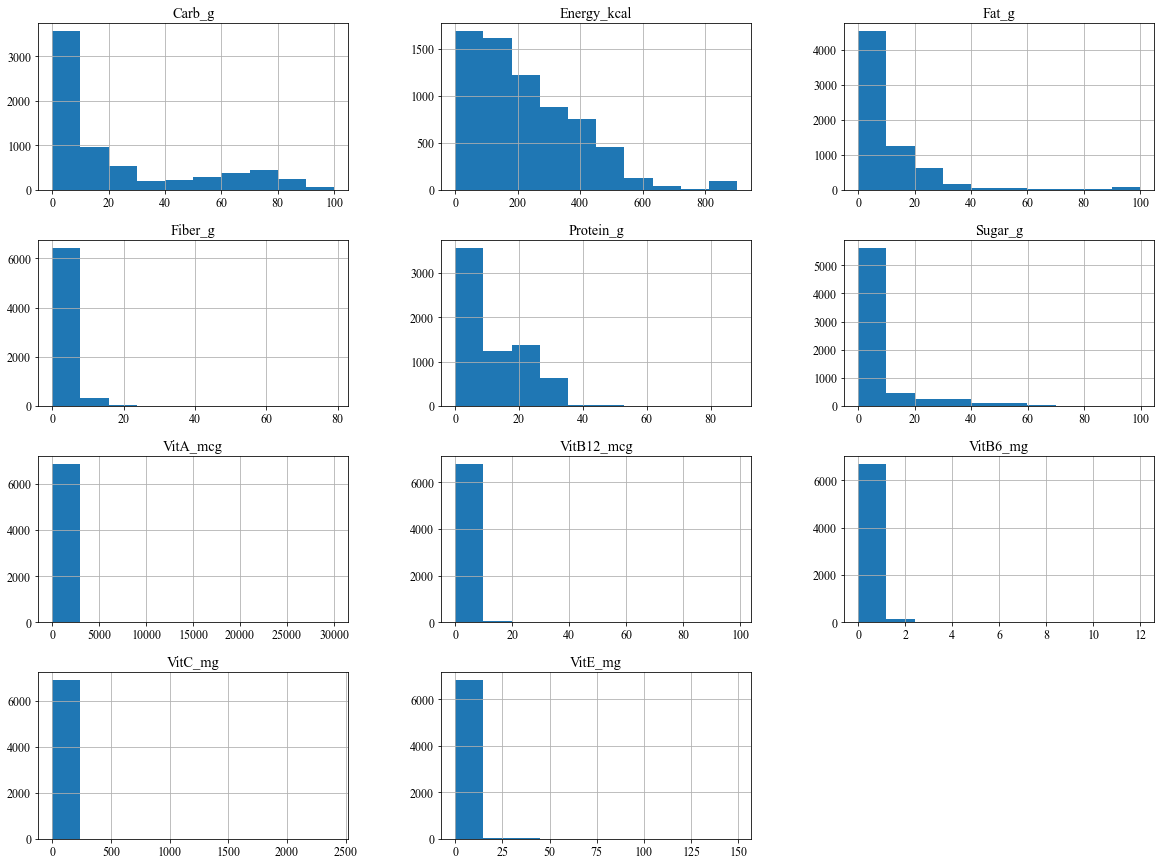

In [12]:
# Visualizing the data and analyzing the amount of nutrients present
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
df.hist(bins=10, figsize=(20, 15))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

**The above graphs shows different amount of nutrient present in the dataset.**

In [13]:
#Checking how many different kinds of FoodGroups are present
df['FoodGroup'].nunique()

25

## Training the datasets

In [17]:
# Assigning the nutrients to X in order to identify the foodgroup
X = df.drop('FoodGroup',axis=1).values
X

array([[4.410e+02, 3.480e+01, 2.186e+01, ..., 0.000e+00, 0.000e+00,
        1.980e+00],
       [2.600e+02, 5.900e+00, 1.320e+01, ..., 9.000e-02, 6.000e-01,
        0.000e+00],
       [9.600e+01, 2.008e+01, 1.700e+00, ..., 1.580e+00, 0.000e+00,
        4.000e-01],
       ...,
       [4.040e+02, 5.100e+00, 1.350e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [7.200e+01, 1.480e+00, 8.800e-01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.690e+02, 1.968e+01, 1.002e+01, ..., 3.430e+00, 0.000e+00,
        1.700e-01]])

In [18]:
# Choosing food groups to be y 
y = df['FoodGroup'].values
y

array(['Legumes and Legume Products', 'Baked Products',
       'Finfish and Shellfish Products', ..., 'Snacks',
       'Cereal Grains and Pasta', 'Beef Products'], dtype=object)

In [19]:
X.shape

(6894, 11)

In [20]:
y.shape

(6894,)

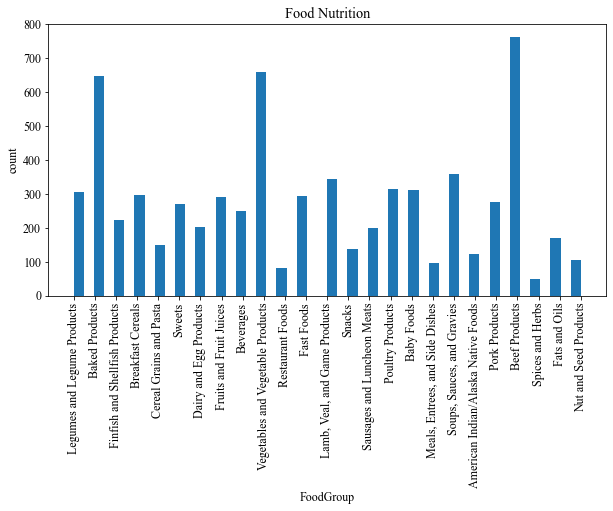

In [22]:
fig=plt.figure(figsize=(10,5))
plt.hist(y, bins=50)
plt.title('Food Nutrition')
plt.xlabel('FoodGroup')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show()

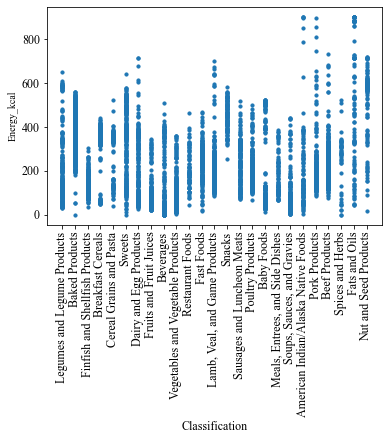

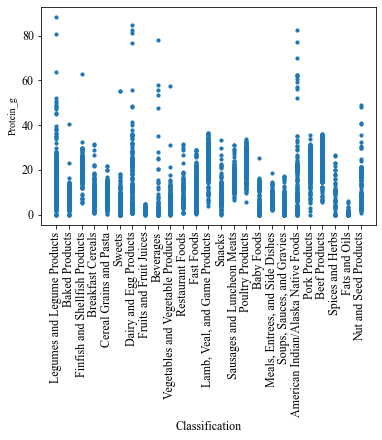

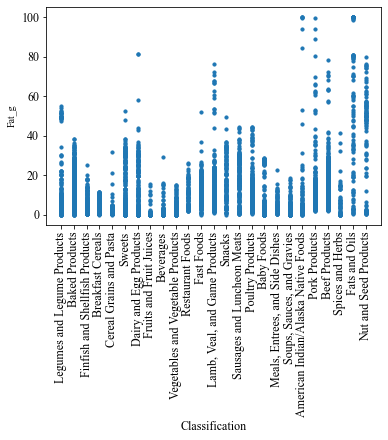

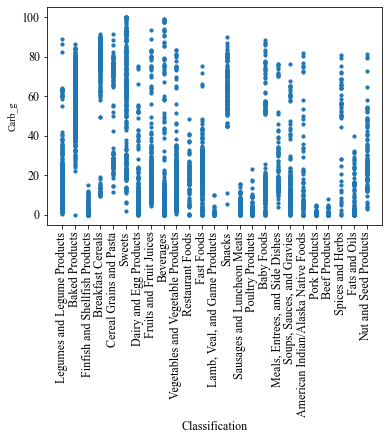

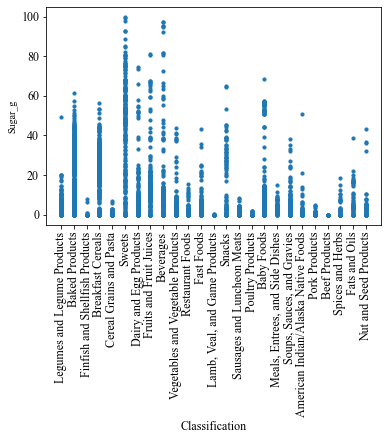

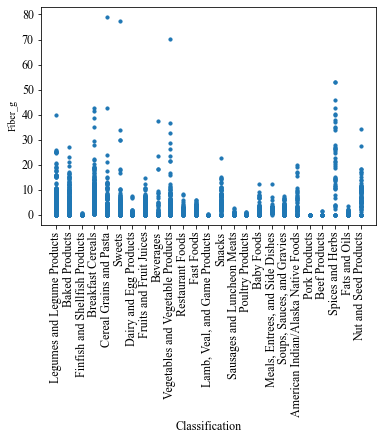

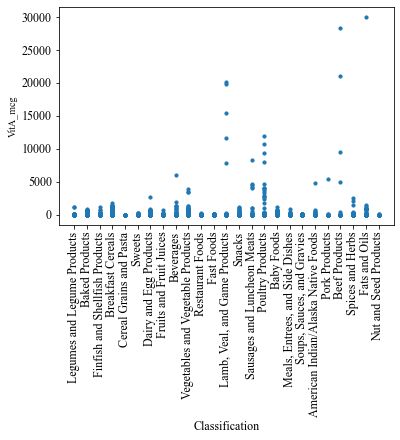

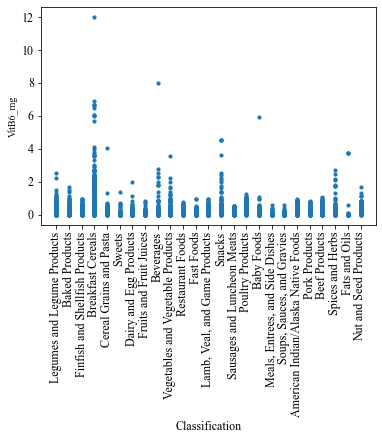

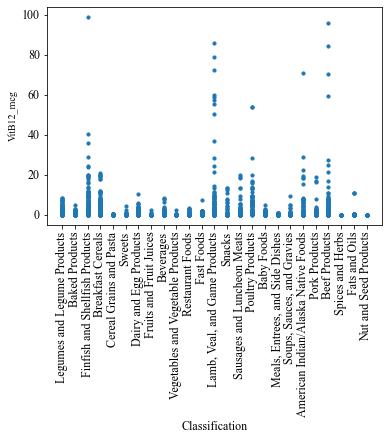

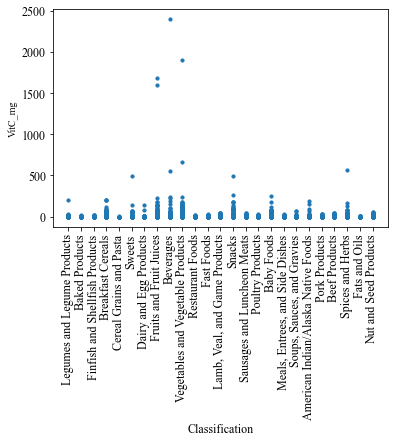

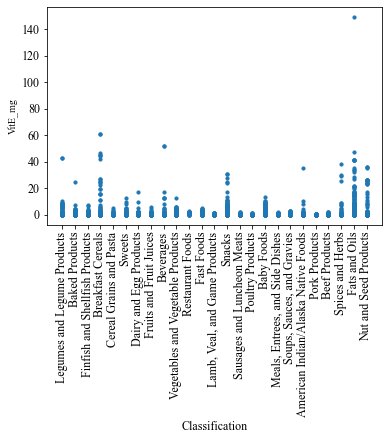

In [23]:
#Checking different engergy levels of each category of nutrients
for column in df:
    q=df['FoodGroup'].values
    if column!='FoodGroup':
        p=df[column].values
        plt.scatter(q,p, s=10)
        plt.xlabel('Classification', fontsize=12)
        plt.xticks(rotation='vertical')
        plt.ylabel(column, fontsize=10)
        plt.show()

In [24]:
# Applying Correlation to dataset
corr = df.corr()

Text(0.5, 1.0, 'Correlation Matrix for cleaned dataset')

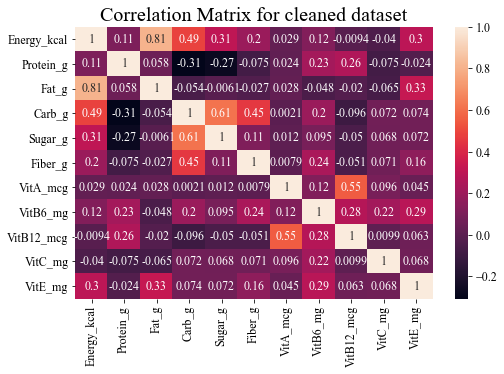

In [26]:
# plotting the Heatmap for the correlation
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(corr,annot=True,ax=ax)

plt.title('Correlation Matrix for cleaned dataset', fontsize =20)

In [27]:
# Counting the number of products in each Food Group
category_count=pd.DataFrame()
category_count['count']=df['FoodGroup'].value_counts()
category_count['count']

Beef Products                          762
Vegetables and Vegetable Products      658
Baked Products                         645
Soups, Sauces, and Gravies             358
Lamb, Veal, and Game Products          342
Poultry Products                       313
Baby Foods                             311
Legumes and Legume Products            305
Breakfast Cereals                      296
Fast Foods                             292
Fruits and Fruit Juices                291
Pork Products                          274
Sweets                                 270
Beverages                              249
Finfish and Shellfish Products         221
Dairy and Egg Products                 203
Sausages and Luncheon Meats            198
Fats and Oils                          169
Cereal Grains and Pasta                149
Snacks                                 136
American Indian/Alaska Native Foods    121
Nut and Seed Products                  106
Meals, Entrees, and Side Dishes         95
Restaurant 

## Graph for the Target Column

[Text(0, 0, 'Beef Products'),
 Text(0, 0, 'Vegetables and Vegetable Products'),
 Text(0, 0, 'Baked Products'),
 Text(0, 0, 'Soups, Sauces, and Gravies'),
 Text(0, 0, 'Lamb, Veal, and Game Products'),
 Text(0, 0, 'Poultry Products'),
 Text(0, 0, 'Baby Foods'),
 Text(0, 0, 'Legumes and Legume Products'),
 Text(0, 0, 'Breakfast Cereals'),
 Text(0, 0, 'Fast Foods'),
 Text(0, 0, 'Fruits and Fruit Juices'),
 Text(0, 0, 'Pork Products'),
 Text(0, 0, 'Sweets'),
 Text(0, 0, 'Beverages'),
 Text(0, 0, 'Finfish and Shellfish Products'),
 Text(0, 0, 'Dairy and Egg Products'),
 Text(0, 0, 'Sausages and Luncheon Meats'),
 Text(0, 0, 'Fats and Oils'),
 Text(0, 0, 'Cereal Grains and Pasta'),
 Text(0, 0, 'Snacks'),
 Text(0, 0, 'American Indian/Alaska Native Foods'),
 Text(0, 0, 'Nut and Seed Products'),
 Text(0, 0, 'Meals, Entrees, and Side Dishes'),
 Text(0, 0, 'Restaurant Foods'),
 Text(0, 0, 'Spices and Herbs')]

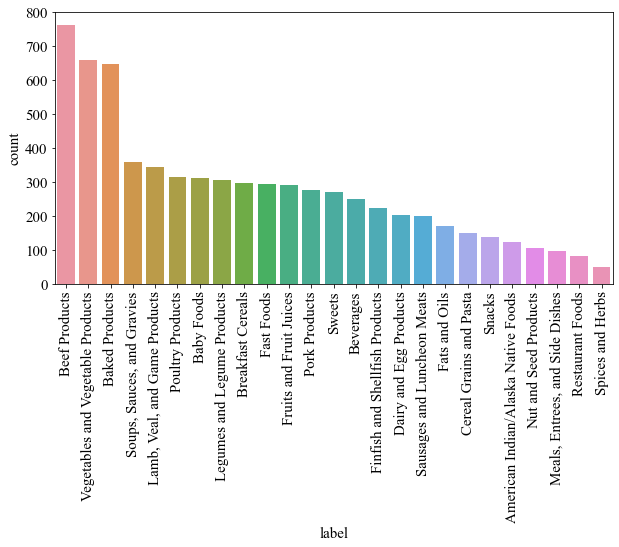

In [28]:
# Visualizing the FoodGroups
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x=category_count.index, y=category_count['count'],ax=ax)
ax.set_ylabel('count',fontsize=15)
ax.set_xlabel('label',fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## Dataset created for testing

After processing the dataset according to our requirements and then analyzing it, we understand that 'Beef Products' have more counts when compared to any other Food category where as the 'Spices and Herbs' have the least count. The data is now ready for application of Machine learning models. The dataset is now 6894 rows × 12 columns which is should be good to predict accurate values. 

After creating this dataset we are now ready to go to further analysis